# Import statements

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and printing data

In [3]:
data = pd.read_csv('road_transport_records.csv')

In [4]:
data.head(10)

,Road ID,Length (km),Number of Bends,Traffic Volume,Accident Risk
0,SH12,50,25,18000,High
1,NH48,250,26,5000,High
2,NH27,140,30,6000,High
3,NH31,75,33,22000,Very High
4,NH48,80,8,22000,Very High
5,NH37,60,55,28000,Extreme
6,NH31,290,33,3200,Very High
7,SH2,300,15,12000,Moderate
8,SH38,600,33,27000,Extreme
9,NH31,260,10,20000,High


In [5]:
data["Accident Risk"].value_counts()

,count
Accident Risk,
High,15
Very High,12
Extreme,11
Moderate,10
Low,2


In [6]:
# check missing vlaues
data.any().isna().sum()

0

In [7]:
data.shape

(50, 5)

In [8]:
data['Accident Risk'] = data['Accident Risk'].map({'Extreme':5,'Very High':4,'High':3, 'Moderate':2,'Low':1})

# Dividing data into train and test

In [10]:
X = data.drop(['Road ID' , 'Accident Risk'] , axis = 1)
y = data['Accident Risk']

In [11]:
print(X.shape)
print(y.shape)

(50, 3)
(50,)


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Fit model and evaluate

In [13]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train,y_train)

dt_pred = decision_tree.predict(X_test)

In [17]:
from sklearn import metrics

print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))

# Precision, recall, and F1 score for multi-class classification
print("Precision (macro):", "%.6f" % metrics.precision_score(y_test, dt_pred, average='macro'))
print("Recall (macro):", "%.6f" % metrics.recall_score(y_test, dt_pred, average='macro'))
print("F1 Score (macro):", "%.6f" % metrics.f1_score(y_test, dt_pred, average='macro'))

# Optional: Micro and weighted averages
print("Precision (micro):", "%.6f" % metrics.precision_score(y_test, dt_pred, average='micro'))
print("Recall (micro):", "%.6f" % metrics.recall_score(y_test, dt_pred, average='micro'))
print("F1 Score (micro):", "%.6f" % metrics.f1_score(y_test, dt_pred, average='micro'))

print("Precision (weighted):", "%.6f" % metrics.precision_score(y_test, dt_pred, average='weighted'))
print("Recall (weighted):", "%.6f" % metrics.recall_score(y_test, dt_pred, average='weighted'))
print("F1 Score (weighted):", "%.6f" % metrics.f1_score(y_test, dt_pred, average='weighted'))


Decision Tree
Accuracy: 0.692308
Precision (macro): 0.875000
Recall (macro): 0.766667
F1 Score (macro): 0.759524
Precision (micro): 0.692308
Recall (micro): 0.692308
F1 Score (micro): 0.692308
Precision (weighted): 0.846154
Recall (weighted): 0.692308
F1 Score (weighted): 0.686447


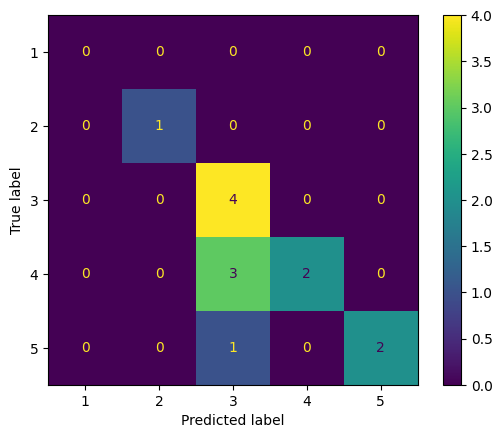

In [16]:
cm = metrics.confusion_matrix(y_test,dt_pred,labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

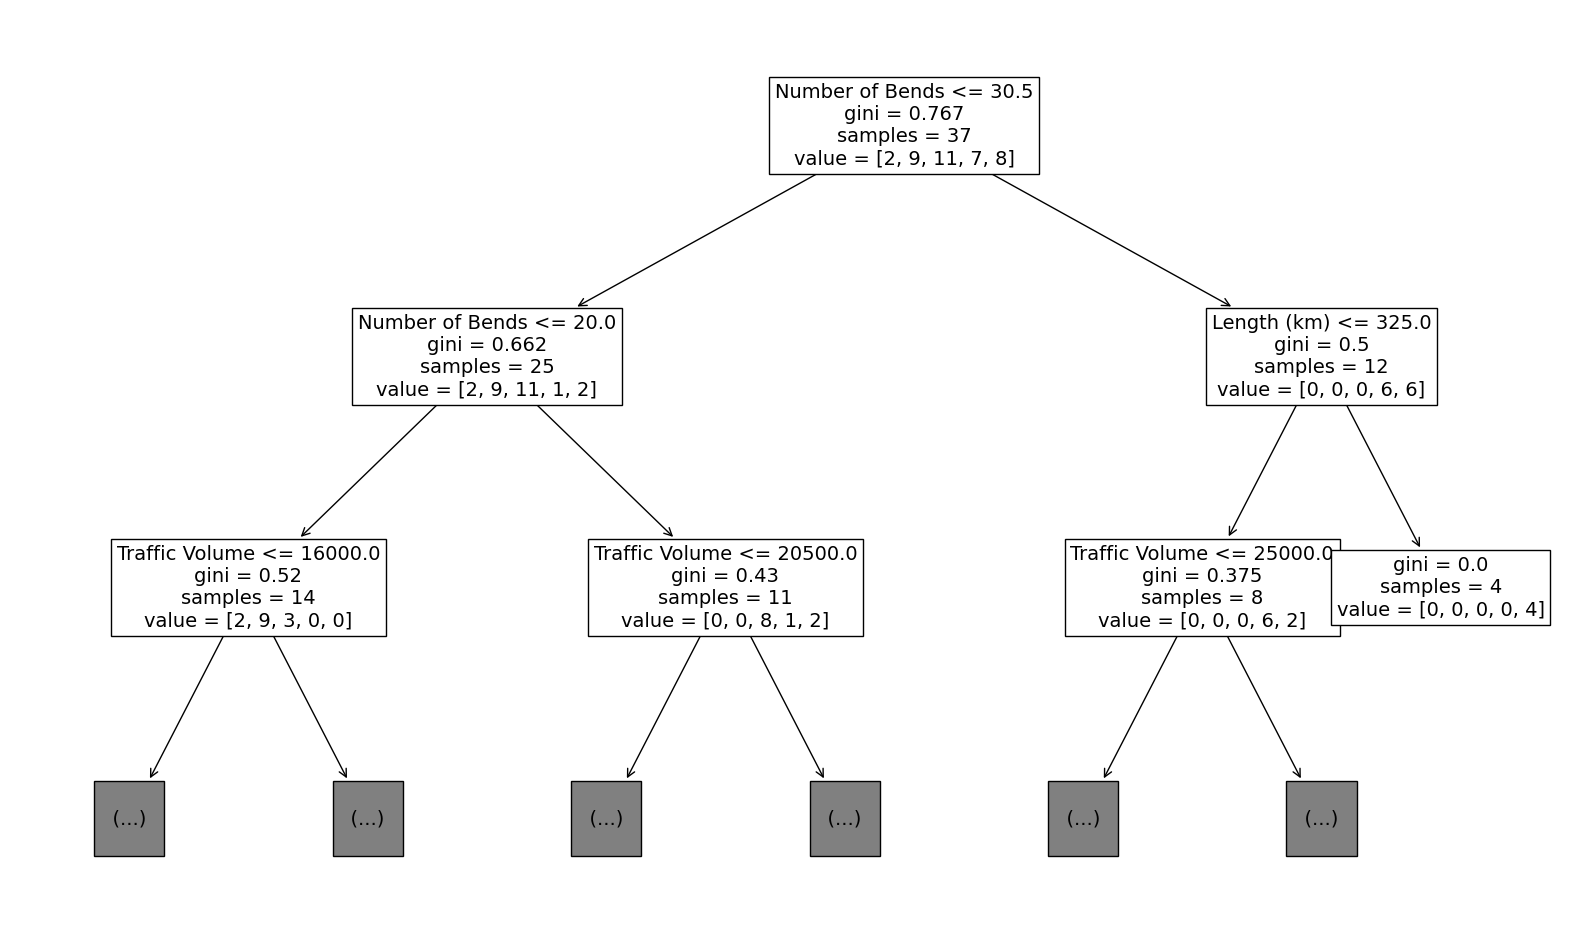

In [19]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);
# AT A VERY BASIC LEVEL, THIS IS THE STRUCTURE OF THE DECISION TREE

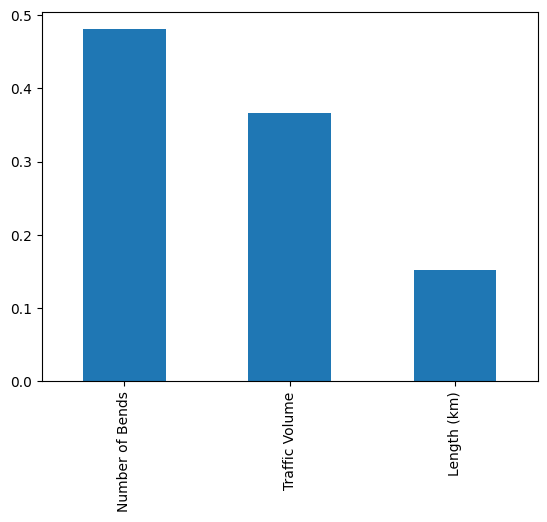

In [20]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [ ]:
np.array(y_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])